In [7]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
#Firstly, training the randomly added layers for 1 epoch (1 complete pass of all items/samples), with all other pretrained layers frozen
#Secondly, unfreezing all the layers, and train all layers for the number of epochs we specified

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\pc\PycharmProjects\hedada\venv\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\pc\PycharmProjects\hedada\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.178418,0.020808,0.006089,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.057126,0.010823,0.004736,00:57


In [17]:
# uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [14]:
learn.predict(img)

('True', TensorBase(1), TensorBase([9.3851e-05, 9.9991e-01]))

In [18]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [9]:
# localizing objects in a picture for self-driving car
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\pc\PycharmProjects\hedada\venv\lib\site-packages\torch\_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.175941,2.532389,00:18


epoch,train_loss,valid_loss,time
0,1.889560,1.624199,00:19
1,1.591728,1.254771,00:19
2,1.383522,1.046112,00:19
3,1.258124,0.960112,00:20
4,1.134710,0.950061,00:19
5,1.032985,0.873696,00:19
6,0.947583,0.802565,00:19
7,0.878600,0.793767,00:20


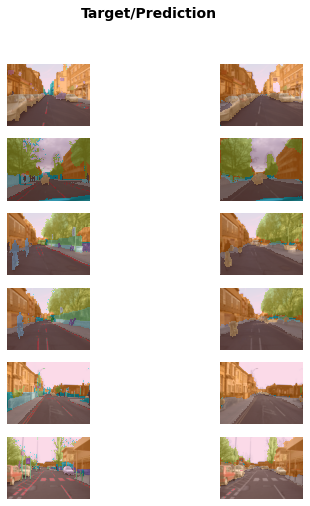

In [10]:
learn.show_results(max_n=6, figsize=(7,8))

In [2]:
# natural language processing (NLP).
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(2, 1e-2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,0.491771,0.412715,0.812880,16:25


epoch,train_loss,valid_loss,accuracy,time
0,0.287795,0.242771,0.901320,16:30
1,0.247992,0.190007,0.928480,16:28


In [16]:
learn.predict("good")

('pos', tensor(1), tensor([0.2594, 0.7406]))

In [9]:
#gather data thru bing: all kinds of bears
import os
from fastbook import *
import fastbook
fastbook.setup_book()
from fastai.vision.widgets import *
key = os.environ.get('AZURE_SEARCH_KEY', 'f4be28837a074dfa90a1b72900a971ef')  #ce6857231ed74c0687bae29c70b7a3ce #f4be28837a074dfa90a1b72900a971ef

In [10]:

search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [11]:

results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

In [12]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

In [5]:
ims

(#150) ['https://bozone.com/site/wp-content/uploads/2019/03/GRIZZLY.jpeg','https://i2.wp.com/nypost.com/wp-content/uploads/sites/2/2020/09/grizzly-bear-89.jpg?quality=90&strip=all&ssl=1','https://833716.smushcdn.com/1704957/wp-content/uploads/2020/06/grizzly-bear-walking-beside-pond-162340-scaled.jpg?lossy=1&strip=1&webp=1','https://www.wallpics.net/wp-content/uploads/2020/12/Grizzly-Bear-10.jpg','https://s3.amazonaws.com/images.gearjunkie.com/uploads/2020/05/grizzly-bear.jpg','https://www.wallpics.net/wp-content/uploads/2020/12/Grizzly-Bear.jpg','http://www.wallpapergeeks.com/wp-content/uploads/2014/03/Grizzly-Bear-Near-McNeil-River-Alaska.jpg','https://i1.wp.com/nypost.com/wp-content/uploads/sites/2/2020/05/grizzly-bear-57.jpg?quality=90&strip=all&ssl=1','https://www.magazineup.com/wp-content/uploads/2020/05/pexels-brett-sayles-2555825-1536x1022.jpg','https://www.alloutdoor.com/wp-content/uploads/2019/08/Grizzly_Bear_Ursus_arctos_ssp..jpg'...]

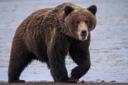

In [13]:

im = Image.open(dest)
im.to_thumb(128,128)

In [14]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [15]:
if not path.exists():
    path.mkdir()
for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [17]:
fns = get_image_files(path)
fns


(#1049) [Path('bears/black/00e440e5-2d66-4ecd-9513-a22f1ca96e23.JPG'),Path('bears/black/01818fda-3c25-46e9-a85d-29b45f8e3268.jpg'),Path('bears/black/02d15796-18d2-40cc-bb6d-035e42328712.jpg'),Path('bears/black/03a9cb4d-fc27-4821-9c57-03442215fb35.png'),Path('bears/black/048b5784-04d7-414a-861a-f669311e3b05.jpg'),Path('bears/black/04f1e3d8-2143-404e-8295-ad8dee0ed239.jpg'),Path('bears/black/0577998e-b231-4f0e-92c3-c01baab0d088.jpg'),Path('bears/black/05d24960-617d-4167-b6ae-6128b716cc67.jpg'),Path('bears/black/07b57570-130f-437b-a5ce-b200ee932a70.jpg'),Path('bears/black/07b80b8c-2746-4636-9681-853f41e43882.jpg')...]

In [18]:
for fn in fns:
    passed = verify_image(fn)
    if not passed:
        os.unlink(fn)

In [22]:
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(fns.map(verify_image)) if not o)
fns = get_image_files(path)
fns
failed = verify_images(fns)
failed
failed.map(Path.unlink);
#these will lead to :BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.
#https://forums.fast.ai/t/brokenprocesspool-exception-on-running-function-verify-images/78210

In [19]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [20]:
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


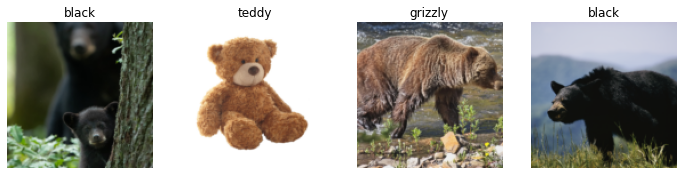

In [21]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True#It turns out that you can ask PIL to be tolerant of files that are truncated (missing some file from the block) by changing a setting.
dls.valid.show_batch(max_n=4, nrows=1)

In [24]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #First we provide a tuple where we specify what types we want for the independent and dependent variables:
    get_items=get_image_files, #The get_image_files function takes a path, and returns a list of all of the images in that path (recursively, by default):
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))# Item transforms 

In [25]:
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [26]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

C:\Users\pc\PycharmProjects\hedada\venv\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\pc\PycharmProjects\hedada\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.811370,0.031857,0.014634,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.149501,0.025077,0.004878,00:40
1,0.109630,0.013927,0.009756,00:41
2,0.088272,0.008201,0.004878,00:42
3,0.077657,0.006506,0.004878,00:42


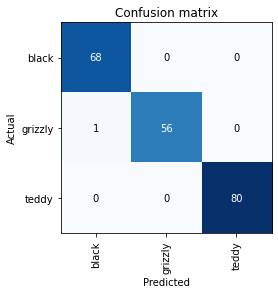

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

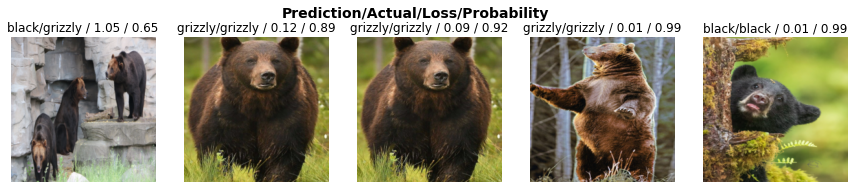

In [29]:
interp.plot_top_losses(5, nrows=1)

In [30]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [31]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [33]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([1.1388e-06, 1.0000e+00, 8.9123e-08]))

In [34]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [42]:

# btn_upload = widgets.FileUpload()
# btn_upload


In [43]:
# # For the book, we can't actually click an upload button, so we fake it
# btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])
# img = PILImage.create(btn_upload.data[-1])
# out_pl = widgets.Output()
# out_pl.clear_output()
# with out_pl: display(img.to_thumb(128,128))
# out_pl


In [44]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred
btn_run = widgets.Button(description='Classify')
btn_run
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])